In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.metrics import pairwise_distances
import pandas as pd
import scipy.stats as ss
import seaborn as sns
from scipy.stats import entropy

z_thresh = 4

In [2]:
# Load all required files for the psilocybin recording day

saline_1_184 = "C:/Users/Conor/Documents/Imaging_Data/Two-Photon/Psilocybin_Project/Evoked_Cohort_Mice/ID184/11282022_GCaMP6s_ID184_saline/TSeries-11282022-0011-023/suite2p/plane0/cells.pkl"
saline_2_184 = "C:/Users/Conor/Documents/Imaging_Data/Two-Photon/Psilocybin_Project/Evoked_Cohort_Mice/ID184/11282022_GCaMP6s_ID184_saline/TSeries-11282022-0011-025/suite2p/plane0/cells.pkl"

saline_1_186 = "C:/Users/Conor/Documents/Imaging_Data/Two-Photon/Psilocybin_Project/Evoked_Cohort_Mice/ID186/11242022_GCaMP6s_ID186_saline/TSeries-11222022-1228-021/suite2p/plane0/cells.pkl"
saline_2_186 = "C:/Users/Conor/Documents/Imaging_Data/Two-Photon/Psilocybin_Project/Evoked_Cohort_Mice/ID186/11242022_GCaMP6s_ID186_saline/TSeries-11222022-1228-022/suite2p/plane0/cells.pkl"

saline_1_237 = "C:/Users/Conor/Documents/Imaging_Data/Two-Photon/Psilocybin_Project/Evoked_Cohort_Mice/ID237/12082022_GCaMP6s_ID237_saline/TSeries-12082022-1143-031/suite2p/plane0/cells.pkl"
saline_2_237 = "C:/Users/Conor/Documents/Imaging_Data/Two-Photon/Psilocybin_Project/Evoked_Cohort_Mice/ID237/12082022_GCaMP6s_ID237_saline/TSeries-12082022-1143-032/suite2p/plane0/cells.pkl"

saline_1_239 = "C:/Users/Conor/Documents/Imaging_Data/Two-Photon/Psilocybin_Project/Evoked_Cohort_Mice/ID239/01132023_ID239_saline/TSeries-01122023-1243-038/suite2p/plane0/cells.pkl"
saline_2_239 = "C:/Users/Conor/Documents/Imaging_Data/Two-Photon/Psilocybin_Project/Evoked_Cohort_Mice/ID239/01132023_ID239_saline/TSeries-01122023-1243-039/suite2p/plane0/cells.pkl"

saline_1_251 = "C:/Users/Conor/Documents/Imaging_Data/Two-Photon/Psilocybin_Project/Evoked_Cohort_Mice/ID251/ID251_13012023_saline/TSeries-01122023-1243-040/suite2p/plane0/cells.pkl"
saline_2_251 = "C:/Users/Conor/Documents/Imaging_Data/Two-Photon/Psilocybin_Project/Evoked_Cohort_Mice/ID251/ID251_13012023_saline/TSeries-01122023-1243-041/suite2p/plane0/cells.pkl"

saline_1_269 = "C:/Users/Conor/Documents/Imaging_Data/Two-Photon/Psilocybin_Project/Evoked_Cohort_Mice/ID269/ID269_06032023_saline/TSeries-03062023-1216-061/suite2p/plane0/cells.pkl"
saline_2_269 = "C:/Users/Conor/Documents/Imaging_Data/Two-Photon/Psilocybin_Project/Evoked_Cohort_Mice/ID269/ID269_06032023_saline/TSeries-03062023-1216-062/suite2p/plane0/cells.pkl"

saline_1_276 = "C:/Users/Conor/Documents/Imaging_Data/Two-Photon/Psilocybin_Project/Evoked_Cohort_Mice/ID276/ID276_03032023_saline/TSeries-03032023-1447-059/suite2p/plane0/cells.pkl"
saline_2_276 = "C:/Users/Conor/Documents/Imaging_Data/Two-Photon/Psilocybin_Project/Evoked_Cohort_Mice/ID276/ID276_03032023_saline/TSeries-03032023-1447-060/suite2p/plane0/cells.pkl"

# saline_1_473 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID473/saline/TSeries-01142009-2331-135/suite2p/plane0/cells.pkl"
# saline_2_473 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID473/saline/TSeries-01142009-2331-136/suite2p/plane0/cells.pkl"

# saline_1_474 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID474/saline/TSeries-01142009-2331-137/suite2p/plane0/cells.pkl"
# saline_2_474 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID474/saline/TSeries-01142009-2331-138/suite2p/plane0/cells.pkl"

all_dicts_saline_1 = [saline_1_184,saline_1_186,saline_1_237,saline_1_239,saline_1_251,saline_1_269,saline_1_276]
all_dicts_saline_2 = [saline_2_184,saline_2_186,saline_2_237,saline_2_239,saline_2_251,saline_2_269,saline_2_276]
all_dicts_saline_1_str = ["saline_1_184","saline_1_186","saline_1_237","saline_1_239","saline_1_251","saline_1_269","saline_1_276"]
all_dicts_saline_2_str =  ["saline_2_184","saline_2_186","saline_2_237","saline_2_239","saline_2_251","saline_2_269","saline_2_276"]
saline_dict_1 ={}
saline_dict_2 = {}

for file in all_dicts_saline_1_str:
    saline_dict_1[file]=None

for file in all_dicts_saline_2_str:
    saline_dict_2[file] = None

zippedsaline = zip(all_dicts_saline_1, all_dicts_saline_1_str)
for k,v in zippedsaline:
    with open(k,'rb') as f:
        saline_dict_1[v] = pickle.load(f)

zippedpsilo = zip(all_dicts_saline_2, all_dicts_saline_2_str)
for k,v in zippedpsilo:
    with open(k,'rb') as f:
        saline_dict_2[v] = pickle.load(f)

In [3]:
print(saline_dict_1.keys())

dict_keys(['saline_1_184', 'saline_1_186', 'saline_1_237', 'saline_1_239', 'saline_1_251', 'saline_1_269', 'saline_1_276'])


In [25]:
# For all of the recordings, extract each cell, calculate the SVD of its sensitivity to each frequency, and store it in the big array. 


matrix_frequency_1 = []
matrix_intensity_1 = []

for dict in saline_dict_1.keys():
    for key in saline_dict_1[dict].keys():
        cell_ID = saline_dict_1[dict][key]
        cell0 = cell_ID['traces']
        nfreq = list(cell_ID['traces'].keys())
        nInt = list(cell_ID['traces'][nfreq[0]].keys())
        ntrial = list(cell_ID['traces'][nfreq[0]][nInt[0]].keys())

        matrix = np.array([[[cell0[i][j][k] for k in ntrial] for j in nInt] for i in nfreq])
            # Average the matrix across trials
        matrix_av = matrix.mean(axis=2)

        # Reshape the matrix so that the baseline mean is subtracted from the mean of the response.  
        matrix_res = matrix_av[:,:,5:].mean(axis=-1) - matrix_av[:,:,:5].mean(axis=-1)

        # Runs SVD on the reshaped matrix, calculates the percentage variance explained.  If it is below threshold, moves onto next iteration.
        U, S, Vt = np.linalg.svd(matrix_res)
        S = S**2/(S**2).sum()

        # matrix_all.append(U[:,0].reshape(-1,1) @ Vt[0,:].reshape(1,-1))
        matrix_frequency_1.append(np.abs(U[:,0]))
        matrix_intensity_1.append(np.abs(Vt[:,0]))

matrix_frequency_1 = np.array(matrix_frequency_1)
matrix_intensity_1 = np.array(matrix_intensity_1)

print(matrix_frequency_1.shape)
print(matrix_intensity_1.shape)

(3321, 12)
(3321, 4)


In [26]:
matrix_frequency_2 = []
matrix_intensity_2 = []

for dict in saline_dict_2.keys():
    for key in saline_dict_2[dict].keys():
        cell_ID = saline_dict_2[dict][key]
        cell0 = cell_ID['traces']
        nfreq = list(cell_ID['traces'].keys())
        nInt = list(cell_ID['traces'][nfreq[0]].keys())
        ntrial = list(cell_ID['traces'][nfreq[0]][nInt[0]].keys())

        matrix = np.array([[[cell0[i][j][k] for k in ntrial] for j in nInt] for i in nfreq])
            # Average the matrix across trials
        matrix_av = matrix.mean(axis=2)

        # Reshape the matrix so that the baseline mean is subtracted from the mean of the response.  
        matrix_res = matrix_av[:,:,5:].mean(axis=-1) - matrix_av[:,:,:5].mean(axis=-1)

        # Runs SVD on the reshaped matrix, calculates the percentage variance explained.  If it is below threshold, moves onto next iteration.
        U, S, Vt = np.linalg.svd(matrix_res)
        S = S**2/(S**2).sum()

        # matrix_all.append(U[:,0].reshape(-1,1) @ Vt[0,:].reshape(1,-1))
        matrix_frequency_2.append(np.abs(U[:,0]))
        matrix_intensity_2.append(np.abs(Vt[:,0]))

matrix_frequency_2 = np.array(matrix_frequency_2)
matrix_intensity_2 = np.array(matrix_intensity_2)

print(matrix_frequency_2.shape)
print(matrix_intensity_2.shape)

(2996, 12)
(2996, 4)


In [30]:
best_frequency_1 = np.argmax(matrix_frequency_1, axis=1)
best_frequency_2 = np.argmax(matrix_frequency_2, axis=1)

best_frequency_1 = pd.Series(best_frequency_1)
best_frequency_2 = pd.Series(best_frequency_2)

counts_1 = best_frequency_1.value_counts(normalize=True)
counts_2 = best_frequency_2.value_counts(normalize=True)

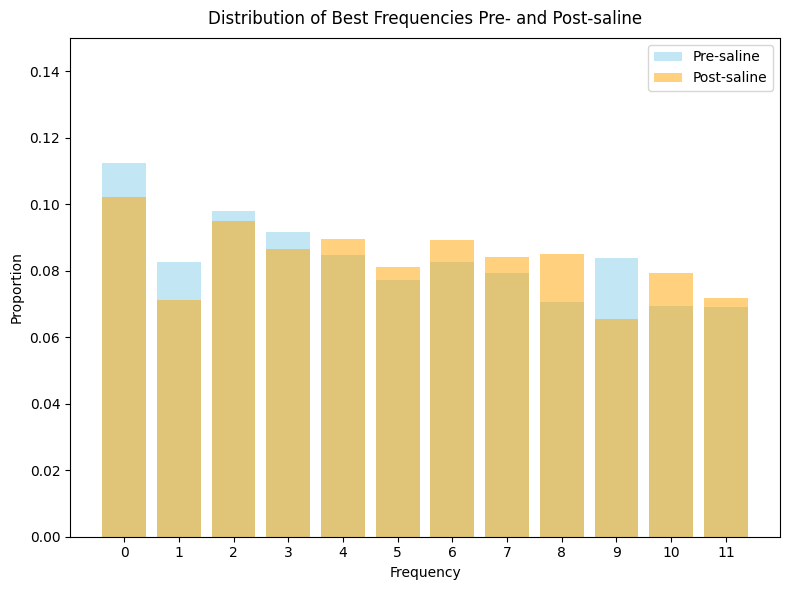

In [36]:
# Create a bar plot comparing the two measures
plt.figure(figsize=(8, 6))
plt.bar(counts_1.index, counts_1.values, color='skyblue', alpha=0.5, label='Pre-saline')
plt.bar(counts_2.index, counts_2.values, color='orange', alpha=0.5, label='Post-saline')
plt.xlabel('Frequency')
plt.ylabel('Proportion')
plt.title('Distribution of Best Frequencies Pre- and Post-saline',pad=10)
plt.xticks(counts_1.index)
plt.ylim(0,0.15)
plt.legend()
plt.tight_layout()
plt.show()

In [38]:
# Calculate the KL divergence:

kl_divergence = entropy(counts_1, counts_2)

print(f"KL Divergence: {kl_divergence}")

KL Divergence: 0.0009677310209829635


PSILOCYBIN DAY:

In [41]:
# Load all required files for the psilocybin recording day

saline_184 = "C:/Users/Conor/Documents/Imaging_Data/Two-Photon/Psilocybin_Project/Evoked_Cohort_Mice/ID184/12052022_GCaMP6s_ID184_psilo/TSeries-01012009-0054-028/suite2p/plane0/cells.pkl"
psilo_184 = "C:/Users/Conor/Documents/Imaging_Data/Two-Photon/Psilocybin_Project/Evoked_Cohort_Mice/ID184/12052022_GCaMP6s_ID184_psilo/TSeries-01012009-0054-029/suite2p/plane0/cells.pkl"
saline_186 = "C:/Users/Conor/Documents/Imaging_Data/Two-Photon/Psilocybin_Project/Evoked_Cohort_Mice/ID186/12012022_GCaMP6s_ID186_psilo/TSeries-12012022-1321-026/suite2p/plane0/cells.pkl"
psilo_186 = "C:/Users/Conor/Documents/Imaging_Data/Two-Photon/Psilocybin_Project/Evoked_Cohort_Mice/ID186/12012022_GCaMP6s_ID186_psilo/TSeries-12012022-1321-027/suite2p/plane0/cells.pkl"
saline_237 = "C:/Users/Conor/Documents/Imaging_Data/Two-Photon/Psilocybin_Project/Evoked_Cohort_Mice/ID237/12122022_GCaMP6s_ID237_psilo/TSeries-12122022-1307-033/suite2p/plane0/cells.pkl"
psilo_237 = "C:/Users/Conor/Documents/Imaging_Data/Two-Photon/Psilocybin_Project/Evoked_Cohort_Mice/ID237/12122022_GCaMP6s_ID237_psilo/TSeries-12122022-1307-034/suite2p/plane0/cells.pkl"
saline_239 = "C:/Users/Conor/Documents/Imaging_Data/Two-Photon/Psilocybin_Project/Evoked_Cohort_Mice/ID239/01172023_Psilo/TSeries-01172023-1212-042/suite2p/plane0/cells.pkl"
psilo_239 = "C:/Users/Conor/Documents/Imaging_Data/Two-Photon/Psilocybin_Project/Evoked_Cohort_Mice/ID239/01172023_Psilo/TSeries-01172023-1212-043/suite2p/plane0/cells.pkl"
saline_251 = "C:/Users/Conor/Documents/Imaging_Data/Two-Photon/Psilocybin_Project/Evoked_Cohort_Mice/ID251/ID251_17012023_psilo/TSeries-01172023-1212-044/suite2p/plane0/cells.pkl"
psilo_251 = "C:/Users/Conor/Documents/Imaging_Data/Two-Photon/Psilocybin_Project/Evoked_Cohort_Mice/ID251/ID251_17012023_psilo/TSeries-01172023-1212-045/suite2p/plane0/cells.pkl"
saline_269 = "C:/Users/Conor/Documents/Imaging_Data/Two-Photon/Psilocybin_Project/Evoked_Cohort_Mice/ID269/ID269_08032023_psilocybin/TSeries-03082023-1211-065/suite2p/plane0/cells.pkl"
psilo_269 = "C:/Users/Conor/Documents/Imaging_Data/Two-Photon/Psilocybin_Project/Evoked_Cohort_Mice/ID269/ID269_08032023_psilocybin/TSeries-03082023-1211-066/suite2p/plane0/cells.pkl"
saline_276 = "C:/Users/Conor/Documents/Imaging_Data/Two-Photon/Psilocybin_Project/Evoked_Cohort_Mice/ID276/ID276_07032023_Psilocybin/TSeries-03072023-1303-063/suite2p/plane0/cells.pkl"
psilo_276 = "C:/Users/Conor/Documents/Imaging_Data/Two-Photon/Psilocybin_Project/Evoked_Cohort_Mice/ID276/ID276_07032023_Psilocybin/TSeries-03072023-1303-064/suite2p/plane0/cells.pkl"

# saline_473 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID473/psilo/TSeries-10132023-1324-139/suite2p/plane0/cells.pkl"
# psilo_473 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID473/psilo/TSeries-10132023-1324-140/suite2p/plane0/cells.pkl"

# saline_474 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID474/psilo/TSeries-10132023-1324-142/suite2p/plane0/cells.pkl"
# psilo_474 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID474/psilo/TSeries-10132023-1324-143/suite2p/plane0/cells.pkl"

all_dicts_saline = [saline_184,saline_186,saline_237,saline_239,saline_251,saline_269,saline_276]
all_dicts_psilo = [psilo_184,psilo_186,psilo_237,psilo_239,psilo_251,psilo_269,psilo_276]
all_dicts_saline_str = ["saline_184","saline_186","saline_237","saline_239","saline_251","saline_269","saline_276"]
all_dicts_psilo_str = ["psilo_184","psilo_186","psilo_237","psilo_239","psilo_251","psilo_269","psilo_276"]
psilo_pre_dict ={}
psilo_post_dict = {}

for file in all_dicts_saline_str:
    psilo_pre_dict[file]=None

for file in all_dicts_psilo_str:
    psilo_post_dict[file] = None

# for file in all_dicts_saline:
#     with open(file,'rb') as f:
#         saline_dict[file] = pickle.load(f)

zippedsaline = zip(all_dicts_saline, all_dicts_saline_str)
for k,v in zippedsaline:
    with open(k,'rb') as f:
        psilo_pre_dict[v] = pickle.load(f)


zippedpsilo = zip(all_dicts_psilo, all_dicts_psilo_str)
for k,v in zippedpsilo:
    with open(k,'rb') as f:
        psilo_post_dict[v] = pickle.load(f)


In [43]:
matrix_frequency_saline = []
matrix_intensity_saline = []

for dict in psilo_pre_dict.keys():
    for key in psilo_pre_dict[dict].keys():
        cell_ID = psilo_pre_dict[dict][key]
        cell0 = cell_ID['traces']
        nfreq = list(cell_ID['traces'].keys())
        nInt = list(cell_ID['traces'][nfreq[0]].keys())
        ntrial = list(cell_ID['traces'][nfreq[0]][nInt[0]].keys())

        matrix = np.array([[[cell0[i][j][k] for k in ntrial] for j in nInt] for i in nfreq])
            # Average the matrix across trials
        matrix_av = matrix.mean(axis=2)

        # Reshape the matrix so that the baseline mean is subtracted from the mean of the response.  
        matrix_res = matrix_av[:,:,5:].mean(axis=-1) - matrix_av[:,:,:5].mean(axis=-1)

        # Runs SVD on the reshaped matrix, calculates the percentage variance explained.  If it is below threshold, moves onto next iteration.
        U, S, Vt = np.linalg.svd(matrix_res)
        S = S**2/(S**2).sum()

        # matrix_all.append(U[:,0].reshape(-1,1) @ Vt[0,:].reshape(1,-1))
        matrix_frequency_saline.append(np.abs(U[:,0]))
        matrix_intensity_saline.append(np.abs(Vt[:,0]))

matrix_frequency_saline = np.array(matrix_frequency_saline)
matrix_intensity_saline = np.array(matrix_intensity_saline)

print(matrix_frequency_saline.shape)
print(matrix_intensity_saline.shape)

(3224, 12)
(3224, 4)


In [45]:
matrix_frequency_psilo = []
matrix_intensity_psilo = []

for dict in psilo_post_dict.keys():
    for key in psilo_post_dict[dict].keys():
        cell_ID = psilo_post_dict[dict][key]
        cell0 = cell_ID['traces']
        nfreq = list(cell_ID['traces'].keys())
        nInt = list(cell_ID['traces'][nfreq[0]].keys())
        ntrial = list(cell_ID['traces'][nfreq[0]][nInt[0]].keys())

        matrix = np.array([[[cell0[i][j][k] for k in ntrial] for j in nInt] for i in nfreq])
            # Average the matrix across trials
        matrix_av = matrix.mean(axis=2)

        # Reshape the matrix so that the baseline mean is subtracted from the mean of the response.  
        matrix_res = matrix_av[:,:,5:].mean(axis=-1) - matrix_av[:,:,:5].mean(axis=-1)

        # Runs SVD on the reshaped matrix, calculates the percentage variance explained.  If it is below threshold, moves onto next iteration.
        U, S, Vt = np.linalg.svd(matrix_res)
        S = S**2/(S**2).sum()

        # matrix_all.append(U[:,0].reshape(-1,1) @ Vt[0,:].reshape(1,-1))
        matrix_frequency_psilo.append(np.abs(U[:,0]))
        matrix_intensity_psilo.append(np.abs(Vt[:,0]))

matrix_frequency_psilo = np.array(matrix_frequency_psilo)
matrix_intensity_psilo = np.array(matrix_intensity_psilo)

print(matrix_frequency_psilo.shape)
print(matrix_intensity_psilo.shape)

(3448, 12)
(3448, 4)


In [46]:
best_frequency_pre = np.argmax(matrix_frequency_saline, axis=1)
best_frequency_post = np.argmax(matrix_frequency_psilo, axis=1)

best_frequency_pre = pd.Series(best_frequency_pre)
best_frequency_post = pd.Series(best_frequency_post)

counts_pre = best_frequency_pre.value_counts(normalize=True)
counts_post = best_frequency_post.value_counts(normalize=True)

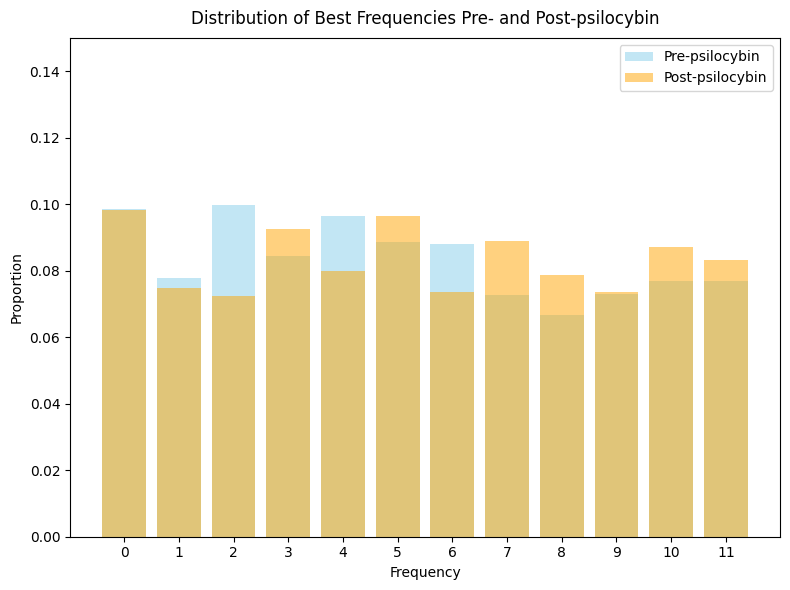

In [50]:
# Create a bar plot comparing the two measures
plt.figure(figsize=(8, 6))
plt.bar(counts_pre.index, counts_pre.values, color='skyblue', alpha=0.5, label='Pre-psilocybin')
plt.bar(counts_post.index, counts_post.values, color='orange', alpha=0.5, label='Post-psilocybin')
plt.xlabel('Frequency')
plt.ylabel('Proportion')
plt.title('Distribution of Best Frequencies Pre- and Post-psilocybin',pad=10)
plt.xticks(counts_pre.index)
plt.ylim(0,0.15)
plt.legend()
plt.tight_layout()
plt.show()

In [51]:
# Calculate the KL divergence:

kl_divergence = entropy(counts_pre, counts_post)

print(f"KL Divergence: {kl_divergence}")

KL Divergence: 0.00046146121095660617
